In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Regressão Logística

Vimos nas aulas anteriores modelos lineares de regressão, onde o valor do *target* era modelado como uma combinação linear de atributos (incluindo o termo constante) mais um termo de erro $\varepsilon$ com média zero:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n + \varepsilon = 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix} + \varepsilon
= \mathbf{x}^{T} \theta + \varepsilon
$$

Nosso modelo ajustado era então $\hat{y} = h(\mathbf{x}, \theta_{opt}) = \mathbf{x}^{T} \theta_{opt}$ onde $\theta_{opt} = \arg \min_{\hat{\theta}} \text{MSE}(\hat{\theta})$ para 

$$
\text{MSE}(\hat{\theta}) = \frac{1}{m} \sum_{i = 1}^{m} \left( y_i - h(\mathbf{x}_i, \hat{\theta}) \right)^2 = \frac{1}{m} \sum_{i = 1}^{m} \left( y_i - \mathbf{x}_i^{T}  \hat{\theta} \right)^2
$$

As vezes, um modelo de regressão pode ser adaptado para um modelo de classificação e vice-versa. Este é o caso da ***regressão logística***, que apesar do nome *não é um método de regressão*, mas sim um método de classificação!


## O problema: classificação binária

Suponha que tenhamos os seguintes dados que relacionam o número de horas de estudo de um aluno com o resultado de uma prova (0: não passou; 1: passou):

| horas| passou? |
|---|---|
| 3.75 | 0.0 |
| 9.51 | 1.0 |
| 7.32 | 0.0 |
| 5.99 | 1.0 |
| 1.56 | 0.0 |
| 1.56 | 0.0 |
| 0.58 | 0.0 |
| 8.66 | 1.0 |
| 6.01 | 1.0 |
| 7.08 | 1.0 |
| 0.21 | 0.0 |
| 9.70 | 1.0 |
| 8.32 | 0.0 |
| 2.12 | 0.0 |
| 1.82 | 0.0 |
| 1.83 | 0.0 |
| 3.04 | 0.0 |
| 5.25 | 1.0 |
| 4.32 | 0.0 |
| 2.91 | 0.0 |
| 6.12 | 1.0 |
| 1.39 | 0.0 |
| 2.92 | 1.0 |
| 3.66 | 1.0 |
| 4.56 | 0.0 |
| 7.85 | 1.0 |
| 2.00 | 0.0 |
| 5.14 | 0.0 |
| 5.92 | 0.0 |
| 0.46 | 0.0 |

Eis um gráfico para ajudar a visualizar esses dados:

![passou ou não](alunos.png "Resultado do teste versus número de horas de estudo")

Parece que se um aluno não estuda não passa, e se estuda bastante passa. E no meio do caminho? Como estimar a chance de que o aluno passe se estudar $7$ horas, por exemplo? Parece que precisamos de uma função interpoladora aqui! Existem várias opções de função interpoladora, vamos estudar uma delas: a **função logística**.

## Função logística

Para adaptar a regressão linear para a regressão logística (que não é regressão, mas sim um método de classificação), precisamos da *função logística*:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Esta função se comporta da seguinte maneira:

- Para valores muito negativos de $x$ temos $\lim_{x \rightarrow -\infty} \sigma(x) = 0$ pois o denominador da fração vai para infinito.

- Para valores muito positivos de $x$ temos $\lim_{x \rightarrow \infty} \sigma(x) = 1$ pois $e^{-x}$ vai para zero.

- Para $x = 0$ temos $\sigma(0) = 0.5$

Eis a cara dessa função:

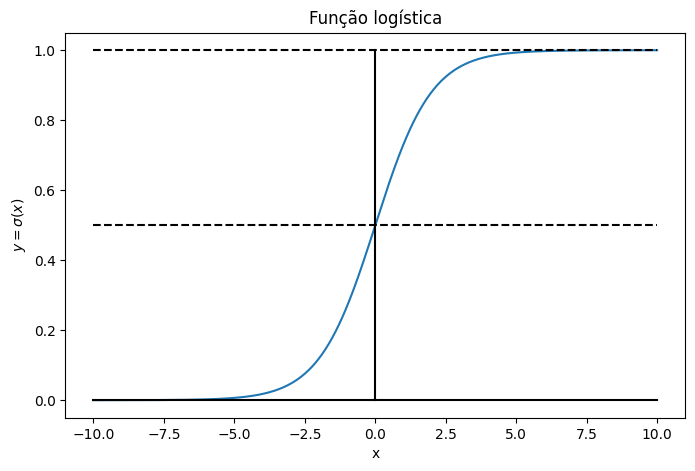

In [2]:
# Gera valores da função logística entre -10 e 10.
x = np.linspace(-10, 10, 1000)
y = 1.0 / (1.0 + np.exp(-x))

# Plota a função logística.
plt.figure(figsize=(8, 5))
plt.plot(x, y)

# Plota linhas auxiliares só para visualizar melhor.
plt.plot([0, 0], [0, 1], 'k-')
plt.plot([-10, 10], [0.0, 0.0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k--')
plt.plot([-10, 10], [1.0, 1.0], 'k--')

# Resto do gráfico: titulo, labels, etc.
plt.title('Função logística')
plt.xlabel('x')
plt.ylabel('$y = \sigma(x)$')

plt.show()

A função logística tem um formato *sigmoide* (ou seja, em forma de "s").

---

**Atividade:** Como você faria (matematicamente) para:

- Deslocar a função logística para a direita?

- Aumentar a largura da "zona de transição de zero para um"?

**R:**
```









```
---

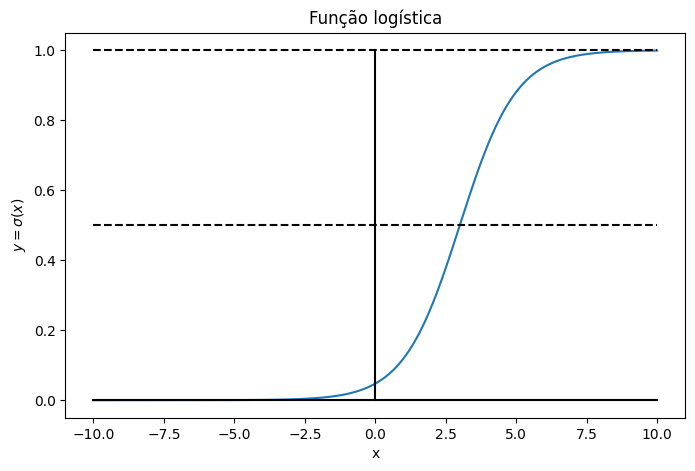

In [3]:
translacao = 3

# Gera valores da função logística entre -10 e 10.
x = np.linspace(-10, 10, 1000)
y = 1.0 / (1.0 + np.exp(-(x - translacao)))

# Plota a função logística.
plt.figure(figsize=(8, 5))
plt.plot(x, y)

# Plota linhas auxiliares só para visualizar melhor.
plt.plot([0, 0], [0, 1], 'k-')
plt.plot([-10, 10], [0.0, 0.0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k--')
plt.plot([-10, 10], [1.0, 1.0], 'k--')

# Resto do gráfico: titulo, labels, etc.
plt.title('Função logística')
plt.xlabel('x')
plt.ylabel('$y = \sigma(x)$')

plt.show()

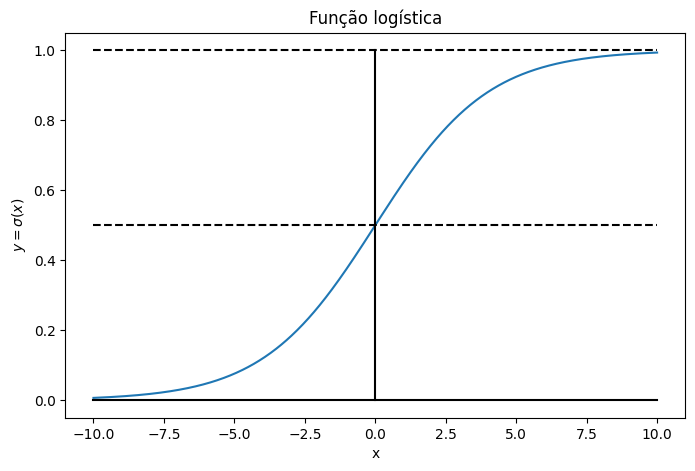

In [4]:
escala = 2

# Gera valores da função logística entre -10 e 10.
x = np.linspace(-10, 10, 1000)
y = 1.0 / (1.0 + np.exp(-(x / escala)))

# Plota a função logística.
plt.figure(figsize=(8, 5))
plt.plot(x, y)

# Plota linhas auxiliares só para visualizar melhor.
plt.plot([0, 0], [0, 1], 'k-')
plt.plot([-10, 10], [0.0, 0.0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k--')
plt.plot([-10, 10], [1.0, 1.0], 'k--')

# Resto do gráfico: titulo, labels, etc.
plt.title('Função logística')
plt.xlabel('x')
plt.ylabel('$y = \sigma(x)$')

plt.show()

Podemos tentar ajustar uma função logística aos nossos dados dos alunos - essa é a base da regressão logística (que não é regressão, mas sim um método de classificação). Na figura abaixo esse ajuste está feito - vamos aprender como fazê-lo logo em seguida.

![passou ou não prob](alunos_prob.png "Probabilidade de aprovação versus número de horas de estudo")

Se tivermos que decidir se achamos que um aluno passa ou não de acordo com o número de horas de estudo deste, o melhor é adotar uma *regra de decisão* do tipo:

- $\hat{p}$ (probabilidade estimada) maior ou igual que $50\%$: acho que passa.

- $\hat{p}$ menor que $50\%$: acho que não passa.

Temos agora um classificador de aluno! Eis o gráfico deste classificador em cima dos dados:

![passou ou não class](alunos_class.png "Vai passar ou não? versus número de horas de estudo")

Essa é a idéia da regressão logística (que não é regressão, mas sim um método de classificação). Vamos estudar agora mais a fundo esse modelo, e como fazer para descobrir os parâmetros da função logística.

---

**Atividade**

- Qual o *precision*, *recall* e acurácia deste exemplo?

- Se eu quisesse garantir uma chance de aprovação de mais de $80\%$, quantas horas um aluno deveria estudar? 

**R:**
```









```

---

## Modelo de regressão logística (que não é regressão, mas sim um método de classificação)

Em um modelo de regressão linear estamos prevendo o valor da variável dependente. Em uma regressão logística (que não é regressão, mas sim um método de classificação), o que estamos tentando prever? Como se trata de um método de classificação, estamos tentando prever a classe $y$ de um objeto de atributos $\mathbf{x}$. Esta classe deverá ser binária: zero ou um, negativo ou positivo. A regressão logística (que não é regressão, mas sim um método de classificação) atinge este objetivo da seguinte forma:

- Para um conjunto de parâmetros $\theta$, calcule a probabilidade (segundo o modelo) de que o objeto de atributos $\mathbf{x}$ seja da classe positiva:

$$
\hat{p} = \sigma(\mathbf{x}^{T} \theta)
$$

Esta será a nossa função de decisão!

(Como encontrar $\theta$? Esse é o objetivo do algoritmo de treinamento, que vamos ver mais abaixo.)

- Determine a classe do objeto usando o threshold $0.5$:

$$
\hat{y} = \left\{ 
\begin{matrix}
0, \text{ se } \hat{p} < 0.5 \\
1, \text{ se } \hat{p} \ge 0.5 \\
\end{matrix}
\right. 
$$

Usando a nomenclatura da função indicadora: $\hat{y} = I_{x \ge 0.5}(\sigma(\mathbf{x}^{T} \theta))$ .

## Função de custo

Para obter o valor ótimo dos parâmetros $\theta$ de um modelo de regressão logística temos que definir uma função de custo. Existem inúmeras possibilidades: basta escolher uma estratégia que penalize os erros e/ou valorize os acertos.

Uma opção bastante conveniente (veremos depois porque) de função de custo para um dado objeto $(\mathbf{x}, y)$ e um vetor de parâmetros $\theta$ é a seguinte:

- A probabilidade predita é $\hat{p} = h(\mathbf{x}, \theta) = \sigma(\mathbf{x}^T \theta)$

- Se a classe real $y$ for 1, a função de custo será $-log(\hat{p})$
    
- Se a classe real $y$ for 0, a função de custo será $-log(1 - \hat{p})$


--- 

**Atividade**

Explique porque esta é uma função de custo que funciona.

**R:**

```
A função de custo 
−log(𝑝^) (ou −log(1−𝑝^))

Funciona bem na regressão logística porque, de forma suave, penaliza com força previsões “confiantes” que estão erradas, ao mesmo tempo em que recompensa rapidamente decisões seguras e corretas. Como a curva nunca fica “plana” até atingirmos o acerto perfeito, o gradiente continua apontando em direção ao ajuste ideal, facilitando o aprendizado por métodos como o gradiente descendente. Além disso, essa forma garante uma superfície de erro sem vale ou pico falso, ou seja, há apenas um mínimo global, o que evita que o algoritmo fique preso em soluções ruins. Finalmente, ela atribui custo moderado a previsões incertas (por volta de 0,5), sinalizando que o modelo ainda precisa de informação para melhorar, e reduz o custo à medida que a confiança e a correção aumentam.
---

A função de custo completa, para todas as amostras, é o custo médio por amostra:

$$
J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \left[y_i \log(\hat{p}) + (1 - y_i) (\log(1 - \hat{p})) \right]
$$

Diferentemente do caso da regressão linear, aqui não temos uma solução fechada como a equação normal. Só nos resta o *gradient descent*. A boa notícia é que com essa função de custo as derivadas parciais são surpreendentemente simples:

$$
\frac{\partial}{\partial \theta_j} J(\theta) = 
\frac{1}{m} 
\sum_{i = 1}^{m} 
\left[ \sigma\left( \mathbf{x}^T \theta_i \right) - y_i \right]
\mathbf{x}_{i,j}
$$


## Iris: o verdadeiro "Hello, world!" dos modelos preditivos!

In [5]:
from sklearn import datasets

iris = datasets.load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Atividade**

Construa um classificador por regressão logística para separar as flores do tipo 'Iris Virginica' das demais usando as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Curva ROC e respectiva área.
- Um diagrama ilustrando a probabilidade da classe positiva. 
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

## Classificação multiclasse

Regressão linear é bacana, mas só serve para classificação binária. Se nosso problema for de classificação multiclasse, como proceder? Uma alternativa é recorrer às técnicas de "One-Versus-One" e "One-Versus-All" vista nas aulas passadas.

Mas temos uma alternativa melhor aqui: podemos generalizar a técnica de regressão linear para a situação de várias classes: esta é a regressão linear multiclasse, ou regressão *softmax*.

### Função softmax

A regressão logística (que não é regressão mas sim classificação) consiste em ajustar aos dados (via minimização da função de custo) uma curva logística. Isso pode ser quebrado em duas partes:

- Calcular o *score* do objeto, que é $\mathbf{x}^T \theta$

- Passar o *score* pela função logística: $\hat{p} = \sigma(score)$

E se tivéssemos várias classes? Uma possibilidade é a seguinte:

- Para cada classe, calcule um *score* desta classe para o objeto: $s_k = \mathbf{x}^T \theta_k$. Note que agora temos um vetor de parâmetros $\theta_k$ por classe $k$.

- Normalize esses *scores* com o auxílio da *função softmax*:

$$
\hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp\left( s_k(\mathbf{x}) \right)}{\sum_{j=1}^{K} \exp\left( s_j(\mathbf{x}) \right)}
$$

A classe atribuida ao objeto será então $\arg \max_k \sigma(s(\mathbf{x}))_k$

## Entropia cruzada

A função de custo da regressão *softmax* é muito parecida com a função de custo da regressão logística binária:

$$
J(\theta) = \frac{1}{m} \sum_{i = 1}^{m} \left[ - \sum_{k = 1}^{K} [y_i = k] \log(\hat{p}_k\left( \mathbf{x}_i \right)) \right]
$$

onde a notação $[y_i = k]$ vale $1$ se a condição é verdadeira, e $0$ caso contrário. Esta notação chama-se "colchetes de Iverson" (*"Iverson's brackets"*).

Esta expressão é a *entropia cruzada* entre $\mathbf{y}$ e $\mathbf{\hat{p}}$. Esta é uma medida que vem da teoria da informação.

**Atividade:** Repita a atividade de classificação do dataset 'Iris' usando apenas as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Diagramas ilustrando a probabilidade para cada classe
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

**Atividade (para casa):** Repita a atividade anterior usando todas as quatro características originais. Qual o aumento de desempenho?